# Business & Consumer Behavior Analysis  
### Exploratory Data Analysis using Superstore Sales Data

## Project Overview
This project focuses on analyzing retail sales data to understand consumer behavior,
identify key business trends, and derive actionable insights using exploratory data analysis (EDA).

The objective is to apply data cleaning, statistical analysis, and visualization techniques
to support data-driven business decision-making.



## Objectives
- Understand the structure and contents of the dataset
- Perform data cleaning and preprocessing
- Identify patterns and trends in customer purchasing behavior
- Generate insights that can help improve business performance


## Importing Required Libraries
In this step, we import the necessary Python libraries used for data manipulation,
numerical operations, and data visualization.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

## Loading the Dataset
The Superstore sales dataset is loaded using pandas.
Relative file paths are used to ensure portability across different systems.


In [3]:
df = pd.read_csv("../data/superstore.csv", encoding="latin1")
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Initial Data Inspection
To understand the dataset, we examine its dimensions, column names,
data types, and basic statistical properties.


In [16]:
df.shape

(9994, 21)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [18]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Initial Observations
- The dataset contains multiple numerical and categorical features.
- Key business variables such as Sales, Profit, and Quantity are present.
- The dataset is large enough to extract meaningful insights.
- Some columns may contain missing values, which will be analyzed next.


## Missing Value Analysis
Missing values can affect analysis and model performance.
In this step, we identify columns that contain missing data
and decide how to handle them appropriately.


In [20]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Missing Value Analysis
The dataset was examined for missing values across all columns.
No missing values were found in the dataset, indicating that the data
is complete and does not require imputation or removal of records.


### Observations
- All columns contain complete data with zero missing values.
- The dataset is already well-prepared for exploratory analysis.


## Date Conversion
Order Date and Ship Date are converted to datetime format
to enable time-based analysis and trend identification.


In [23]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

## Distribution of Sales
Understanding the distribution of sales helps identify
common order values and potential outliers.


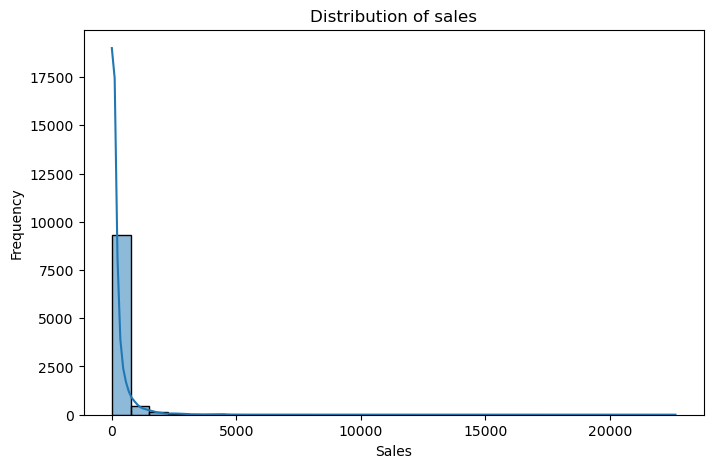

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["Sales"],bins=30,kde=True)
plt.title("Distribution of sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

### Insight
- The sales distribution is highly right-skewed, indicating that most customer orders
  are of low value.
- A small proportion of orders contribute disproportionately to total sales,
  forming a long tail of high-value transactions.
- These high-value orders can be considered outliers but may represent
  bulk purchases or corporate customers.


## Impact of Discount on Profit
This analysis examines how discounts affect profitability.


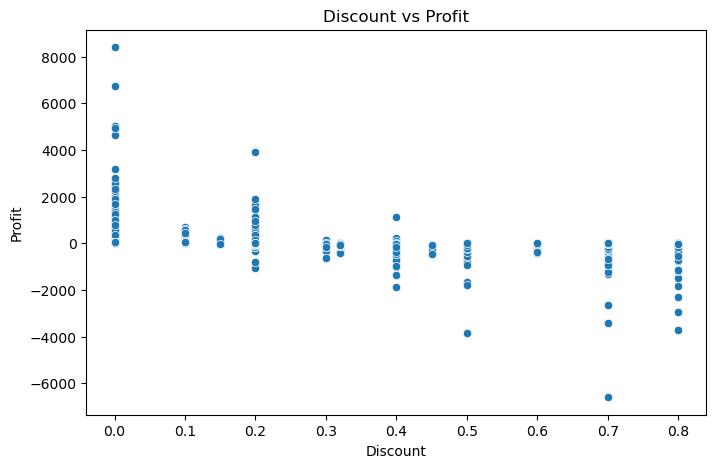

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Discount",y="Profit",data=df)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

### Insight
- Orders with low or no discount tend to generate higher and more stable profits.
- As discount levels increase, profitability declines significantly,
  with high discounts frequently resulting in negative profit.
- This indicates that aggressive discounting strategies may be eroding profit margins
  rather than driving sustainable revenue growth.
- High discount orders may be driven by competitive pressure or clearance sales,
  but their long-term impact on profitability should be carefully evaluated.



## Monthly Sales Trend
Time-series analysis helps understand seasonal patterns
and long-term sales trends.


In [17]:
df["Order Date"] = pd.to_datetime(df["Order Date"])


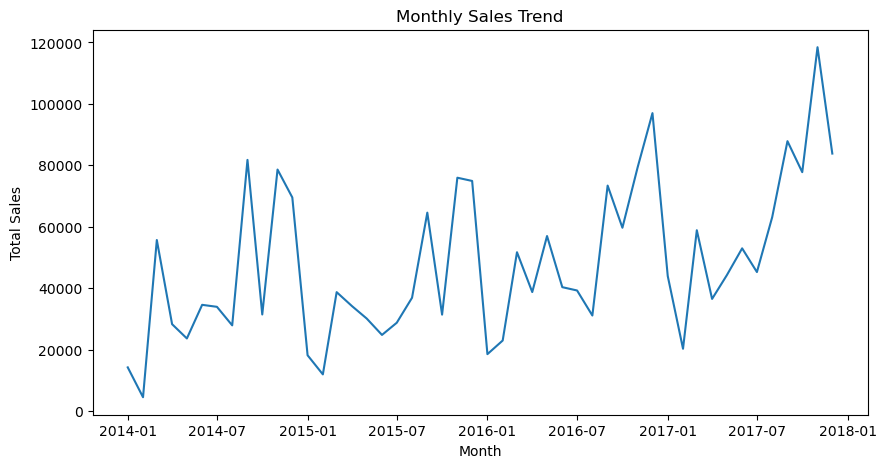

In [18]:
monthly_sales = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

### Insight
- The monthly sales trend shows an overall upward movement, indicating growth in business performance over time.
- Sales exhibit noticeable seasonal fluctuations, with recurring peaks and dips across years.
- Certain months experience sharp spikes in sales, which may be driven by promotions, festive periods, or bulk purchases.
- Understanding these patterns can help in demand forecasting and inventory planning.
